In [1]:
from retro_branching.utils import get_most_recent_checkpoint_foldername, gen_co_name
from retro_branching.networks import BipartiteGCN
from retro_branching.agents import Agent, REINFORCEAgent, PseudocostBranchingAgent, StrongBranchingAgent, RandomAgent, DQNAgent, DoubleDQNAgent
from retro_branching.environments import EcoleBranching, EcoleConfiguring
from retro_branching.validators import ReinforcementLearningValidator

import matplotlib.pyplot as plt
import sys
import subprocess

import torch
import ecole
import numpy as np
import os
import shutil
import glob
import time
import gzip
import pickle
import copy

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from omegaconf import DictConfig, OmegaConf
import shutil

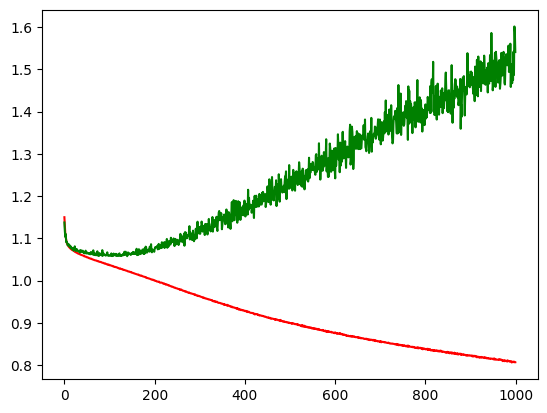

1.0576393071342918 139


In [2]:
log_5 = './outputs/facility_5_5/il/facil_supervised_learner/gnn/gnn_1/checkpoint_1000/epochs_log.pkl'

with gzip.open(log_5, 'rb') as f:
    log = pickle.load(f)

plt.plot(log['mean_train_loss'], c='r')
plt.plot(log['mean_valid_loss'], c='g')
plt.show()
print(np.min(log['mean_valid_loss']), np.argmin(log['mean_valid_loss']))

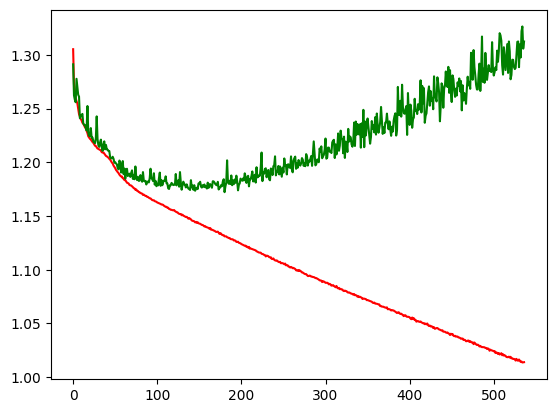

1.1721893583559522 180


In [3]:
log_15 = './outputs/facility_15_15/il/checkpoint_537/epochs_log.pkl'

with gzip.open(log_15, 'rb') as f:
    log = pickle.load(f)

plt.plot(log['mean_train_loss'], c='r')
plt.plot(log['mean_valid_loss'], c='g')
plt.show()
print(np.min(log['mean_valid_loss']), np.argmin(log['mean_valid_loss']))

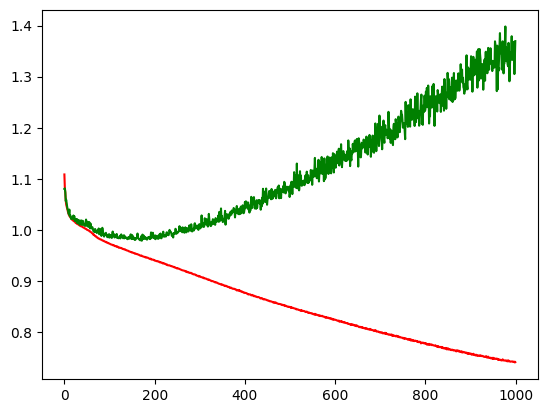

0.9790951076208376 171


In [4]:
log_25 = './outputs/facility_25_25/il/facil_supervised_learner/gnn/gnn_0/checkpoint_1000/epochs_log.pkl'

with gzip.open(log_25, 'rb') as f:
    log = pickle.load(f)

plt.plot(log['mean_train_loss'], c='r')
plt.plot(log['mean_valid_loss'], c='g')
plt.show()
print(np.min(log['mean_valid_loss']), np.argmin(log['mean_valid_loss']))

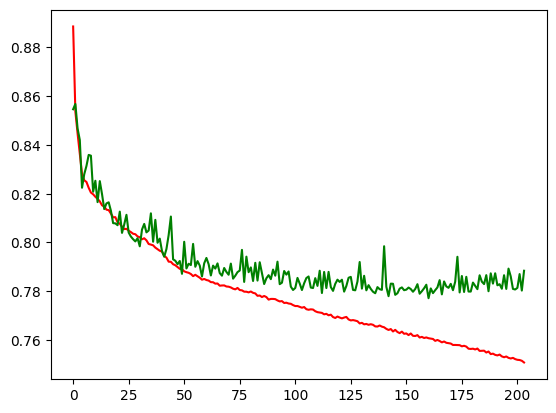

0.7771295744765039 160


In [5]:
log_50 = './outputs/facility_50_50/il/facil_supervised_learner/gnn/gnn_0/checkpoint_204/epochs_log.pkl'

with gzip.open(log_50, 'rb') as f:
    log = pickle.load(f)

plt.plot(log['mean_train_loss'], c='r')
plt.plot(log['mean_valid_loss'], c='g')
plt.show()
print(np.min(log['mean_valid_loss']), np.argmin(log['mean_valid_loss']))

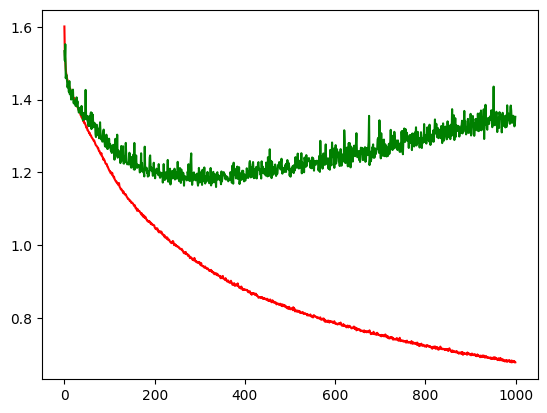

1.1596239278060754 336


In [50]:
log_crabs = './outputs/crabs_12_20_35/il/crabs_supervised_learner/gnn/gnn_0/checkpoint_1001/epochs_log.pkl'

with gzip.open(log_crabs, 'rb') as f:
    log = pickle.load(f)

plt.plot(log['mean_train_loss'], c='r')
plt.plot(log['mean_valid_loss'], c='g')
plt.show()
print(np.min(log['mean_valid_loss']), np.argmin(log['mean_valid_loss']))

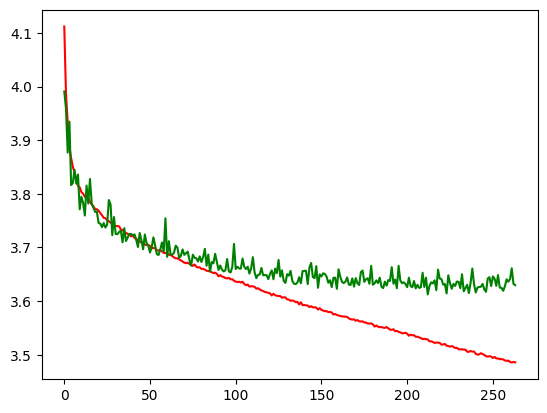

3.61244049017569 212


In [99]:
log_crabs = './outputs/crabs_12_20_35_v/il/crabs_supervised_learner/gnn/gnn_0/checkpoint_264/epochs_log.pkl'

with gzip.open(log_crabs, 'rb') as f:
    log = pickle.load(f)

plt.plot(log['mean_train_loss'], c='r')
plt.plot(log['mean_valid_loss'], c='g')
plt.show()
print(np.min(log['mean_valid_loss']), np.argmin(log['mean_valid_loss']))

In [54]:
path_to_model_5 = './outputs/facility_5_5/il/facil_supervised_learner/gnn/gnn_1/checkpoint_136/'
path_to_model_15 = './outputs/facility_15_15/il/checkpoint_181/'
path_to_model_25 = './outputs/facility_25_25/il/facil_supervised_learner/gnn/gnn_0/checkpoint_172/'
path_to_model_50 = './outputs/facility_50_50/il/facil_supervised_learner/gnn/gnn_0/checkpoint_161/'
path_to_crabs_12_20_35 = './outputs/crabs_12_20_35/il/crabs_supervised_learner/gnn/gnn_0/checkpoint_337/'
path_to_crabs_12_20_35_v = './outputs/crabs_12_20_35_v/il/crabs_supervised_learner/gnn/gnn_0/checkpoint_213/'


path_to_data_5 = './outputs/test/5x5/'
path_to_data_15 = './outputs/test/15x15/'
path_to_data_25 = './outputs/test/25x25/'
path_to_data_50 = './outputs/test/50x50/'
path_to_data_75 = './outputs/test/75x75/'
path_to_data_crabs_12_20_35 = './outputs/test/crabs_12_20_35/'


path_to_save_5 = './outputs/facility_5_5/testing/'
path_to_save_15 = './outputs/facility_15_15/testing/'
path_to_save_25 = './outputs/facility_25_25/testing/'
path_to_save_50 = './outputs/facility_50_50/testing/'
path_to_save_sb = './outputs/facility_sb/testing/'
path_to_save_random = './outputs/facility_random/testing/'

In [109]:
ch = './outputs/crabs_12_20_35_v/testing/rl_validator/rl_validator_1/checkpoint_82/episodes_log.pkl'
with gzip.open(ch, 'rb') as file:
    log = pickle.load(file)
agent_name = log['agent_names'][0]
n_nodes_per_instance = [np.abs(np.sum(episode_nodes)) for episode_nodes in log[agent_name]['num_nodes']]
n_mean_nodes = np.mean(n_nodes_per_instance)

In [110]:
np.median(n_nodes_per_instance)

9.0

In [111]:
n_mean_nodes

22.58156911581569

In [112]:
np.std(n_nodes_per_instance)

74.16975419528123

In [119]:
np.quantile(n_nodes_per_instance, [0.25, 0.75, 0.95])

array([ 6. , 17. , 68.9])

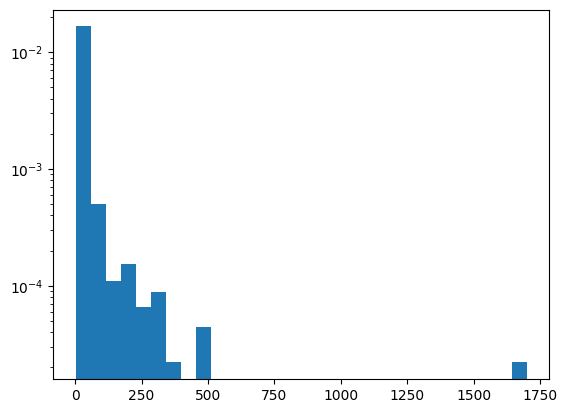

In [123]:
plt.hist(n_nodes_per_instance, bins=30, density=True)
# plt.xscale('log')
plt.yscale('log')

In [115]:
np.mean(sorted(n_nodes_per_instance)[:int(len(n_nodes_per_instance)*0.95)])

12.448818897637794

In [7]:
def execute(n, path_to_model, path_to_data, path_to_save,
            main_comand = 'python experiments/validator.py --config-path=configs --config-name=validator_facil_5.yaml'):
    arg_1 = 'instances.co_class_kwargs.n_customers=' + str(n)
    arg_2 = 'instances.co_class_kwargs.n_facilities=' + str(n)
    path_to_model_ = 'experiment.path_to_load_agent=' + path_to_model
    path_to_data_ = 'experiment.path_to_load_instances=' + path_to_data
    path_to_save_ = 'experiment.path_to_save=' + path_to_save
    comand = ' '.join([main_comand, arg_1, arg_2, path_to_model_, path_to_data_, path_to_save_])
    subprocess.Popen(comand, shell=True)


def read(path_to_save):
    path_to_save = os.path.join(path_to_save, 'rl_validator', 'rl_validator_1')
    max_c = max([int(c[11:]) for c in os.listdir(path_to_save) if 'checkpoint' in c])
    checkpoint = os.path.join(path_to_save, 'checkpoint_' + str(max_c), 'episodes_log.pkl')
    with gzip.open(checkpoint, 'rb') as f:
        log = pickle.load(f)
    agent_name = log['agent_names'][0]
    n_nodes_per_instance = [np.abs(np.sum(episode_nodes)) for episode_nodes in log[agent_name]['num_nodes']]
    n_mean_nodes = np.mean(n_nodes_per_instance)
    return n_mean_nodes, n_nodes_per_instance


def test_run():
    nn = [5, 15, 25, 50, 75]
    models = [path_to_model_5, path_to_model_15, path_to_model_25, path_to_model_50]
    data = [path_to_data_5, path_to_data_15, path_to_data_25, path_to_data_50, path_to_data_75]
    saves = [path_to_save_5, path_to_save_15, path_to_save_25, path_to_save_50]
    
    for m, s in zip(models, saves):
        for i, (n, d) in enumerate(zip(nn, data)):
            s_ = s + str(n) + '/'
            execute(n, m, d, s_)

In [20]:
test_run()

experiments/validator.py:29: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path='configs', config_name='config.yaml')
experiments/validator.py:29: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path='configs', config_name='config.yaml')
experiments/validator.py:29: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path='configs', config_name='config.yaml')
experiments/validator.py:29: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path='configs', config_name='config.yaml')
experiments/validator.py

Initialised agent and agent-to-path dict: {'./outputs/facility_15_15/testing/5/': <retro_branching.src.agents.agent.Agent object at 0x7fd068674450>}
Loaded 100 instances from path ./outputs/test/5x5/
Initialised env.
Initialised metrics: ['num_nodes', 'solving_time', 'lp_iterations']
Initialised validator. Will save to: ./outputs/facility_15_15/testing/5//rl_validator/rl_validator_1/
Episode 0 || il: Run time: 1.71 s | Nodes: 2.0 | LP iters: 3.0 | Solve time: 1.614 s
Saved checkpoint to ./outputs/facility_15_15/testing/5//rl_validator/rl_validator_1/checkpoint_1/
Episode 1 || il: Run time: 0.016 s | Nodes: 2.0 | LP iters: 12.0 | Solve time: 0.003 s
Episode 2 || il: Run time: 0.016 s | Nodes: 2.0 | LP iters: 6.0 | Solve time: 0.004 s
Episode 3 || il: Run time: 0.015 s | Nodes: 2.0 | LP iters: 3.0 | Solve time: 0.004 s
Episode 4 || il: Run time: 0.019 s | Nodes: 2.0 | LP iters: 1.0 | Solve time: 0.003 s
Episode 5 || il: Run time: 0.017 s | Nodes: 2.0 | LP iters: 17.0 | Solve time: 0.004 

/root/miniconda3/envs/bb/lib/python3.7/site-packages/hydra/_internal/hydra.py:127: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/next/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  configure_logging=with_log_configuration,
/root/miniconda3/envs/bb/lib/python3.7/site-packages/hydra/_internal/hydra.py:127: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/next/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  configure_logging=with_log_configuration,


Initialised agent and agent-to-path dict: {'./outputs/facility_50_50/testing/5/': <retro_branching.src.agents.agent.Agent object at 0x7f5bdaf87490>}
Loaded 100 instances from path ./outputs/test/5x5/
Initialised env.
Initialised metrics: ['num_nodes', 'solving_time', 'lp_iterations']
Initialised validator. Will save to: ./outputs/facility_50_50/testing/5//rl_validator/rl_validator_1/
Episode 0 || il: Run time: 1.101 s | Nodes: 2.0 | LP iters: 1.0 | Solve time: 1.046 s
Saved checkpoint to ./outputs/facility_50_50/testing/5//rl_validator/rl_validator_1/checkpoint_1/
Episode 1 || il: Run time: 0.023 s | Nodes: 4.0 | LP iters: 20.0 | Solve time: 0.009 s
Episode 2 || il: Run time: 0.018 s | Nodes: 2.0 | LP iters: 6.0 | Solve time: 0.005 s
Episode 3 || il: Run time: 0.017 s | Nodes: 2.0 | LP iters: 3.0 | Solve time: 0.005 s
Episode 4 || il: Run time: 0.028 s | Nodes: 2.0 | LP iters: 1.0 | Solve time: 0.009 s
Episode 5 || il: Run time: 0.023 s | Nodes: 2.0 | LP iters: 17.0 | Solve time: 0.009

/root/miniconda3/envs/bb/lib/python3.7/site-packages/hydra/_internal/hydra.py:127: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/next/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  configure_logging=with_log_configuration,
/root/miniconda3/envs/bb/lib/python3.7/site-packages/hydra/_internal/hydra.py:127: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/next/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  configure_logging=with_log_configuration,



Saved checkpoint to ./outputs/facility_25_25/testing/5//rl_validator/rl_validator_1/checkpoint_9/
Episode 81 || il: Run time: 0.014 s | Nodes: 2.0 | LP iters: 11.0 | Solve time: 0.003 s
Episode 82 || il: Run time: 0.014 s | Nodes: 2.0 | LP iters: 2.0 | Solve time: 0.003 s
Ran out of iterations.
Ran out of iterations.
Ran out of iterations.
Ran out of iterations.
Ran out of iterations.
Ran out of iterations.
Ran out of iterations.
Ran out of iterations.
Ran out of iterations.
Ran out of iterations.
Ran out of iterations.
Ran out of iterations.
Ran out of iterations.
Ran out of iterations.
Ran out of iterations.
Ran out of iterations.
Ran out of iterations.
Saved checkpoint to ./outputs/facility_25_25/testing/5//rl_validator/rl_validator_1/checkpoint_10/
Finished path ./outputs/facility_25_25/testing/5/ validator in 4.788 s
Finished validating agent il in 4.790 s.
Initialised agent and agent-to-path dict: {'./outputs/facility_5_5/testing/15/': <retro_branching.src.agents.agent.Agent obj

Episode 78 || il: Run time: 0.061 s | Nodes: 8.0 | LP iters: 99.0 | Solve time: 0.013 sInitialised agent and agent-to-path dict: {'./outputs/facility_25_25/testing/15/': <retro_branching.src.agents.agent.Agent object at 0x7f0923032350>}
Loaded 100 instances from path ./outputs/test/15x15/
Initialised env.
Initialised metrics: ['num_nodes', 'solving_time', 'lp_iterations']
Initialised validator. Will save to: ./outputs/facility_25_25/testing/15//rl_validator/rl_validator_1/
Episode 0 || il: Run time: 1.872 s | Nodes: 6.0 | LP iters: 300.0 | Solve time: 1.331 s
Saved checkpoint to ./outputs/facility_25_25/testing/15//rl_validator/rl_validator_1/checkpoint_1/
Episode 1 || il: Run time: 1.05 s | Nodes: 6.0 | LP iters: 268.0 | Solve time: 0.025 s
Episode 2 || il: Run time: 0.561 s | Nodes: 8.0 | LP iters: 290.0 | Solve time: 0.023 s
Episode 3 || il: Run time: 0.098 s | Nodes: 18.0 | LP iters: 551.0 | Solve time: 0.048 s
Episode 4 || il: Run time: 0.742 s | Nodes: 10.0 | LP iters: 359.0 | So

/root/miniconda3/envs/bb/lib/python3.7/site-packages/hydra/_internal/hydra.py:127: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/next/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  configure_logging=with_log_configuration,



Episode 79 || il: Run time: 0.381 s | Nodes: 8.0 | LP iters: 202.0 | Solve time: 0.017 s
Episode 80 || il: Run time: 0.528 s | Nodes: 12.0 | LP iters: 461.0 | Solve time: 0.039 s
Saved checkpoint to ./outputs/facility_5_5/testing/15//rl_validator/rl_validator_1/checkpoint_9/
Episode 81 || il: Run time: 0.083 s | Nodes: 4.0 | LP iters: 20.0 | Solve time: 0.006 s
Episode 82 || il: Run time: 0.29 s | Nodes: 16.0 | LP iters: 325.0 | Solve time: 0.032 s
Episode 83 || il: Run time: 0.814 s | Nodes: 12.0 | LP iters: 522.0 | Solve time: 0.038 s
Episode 84 || il: Run time: 0.189 s | Nodes: 4.0 | LP iters: 45.0 | Solve time: 0.008 s
Episode 85 || il: Run time: 0.367 s | Nodes: 15.0 | LP iters: 353.0 | Solve time: 0.039 s
Episode 86 || il: Run time: 0.098 s | Nodes: 2.0 | LP iters: 24.0 | Solve time: 0.003 s
Episode 87 || il: Run time: 1.096 s | Nodes: 4.0 | LP iters: 242.0 | Solve time: 0.016 s
Episode 88 || il: Run time: 0.339 s | Nodes: 10.0 | LP iters: 266.0 | Solve time: 0.025 s
Episode 89 

/root/miniconda3/envs/bb/lib/python3.7/site-packages/hydra/_internal/hydra.py:127: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/next/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  configure_logging=with_log_configuration,
/root/miniconda3/envs/bb/lib/python3.7/site-packages/hydra/_internal/hydra.py:127: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/next/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  configure_logging=with_log_configuration,



Episode 79 || il: Run time: 0.383 s | Nodes: 14.0 | LP iters: 215.0 | Solve time: 0.025 s
Episode 80 || il: Run time: 0.512 s | Nodes: 4.0 | LP iters: 216.0 | Solve time: 0.016 s
Saved checkpoint to ./outputs/facility_25_25/testing/15//rl_validator/rl_validator_1/checkpoint_9/
Episode 81 || il: Run time: 0.081 s | Nodes: 4.0 | LP iters: 18.0 | Solve time: 0.006 s
Episode 82 || il: Run time: 0.302 s | Nodes: 20.0 | LP iters: 362.0 | Solve time: 0.036 s
Episode 83 || il: Run time: 0.82 s | Nodes: 12.0 | LP iters: 512.0 | Solve time: 0.035 s
Episode 84 || il: Run time: 0.196 s | Nodes: 4.0 | LP iters: 40.0 | Solve time: 0.009 s
Episode 85 || il: Run time: 0.37 s | Nodes: 21.0 | LP iters: 385.0 | Solve time: 0.059 s
Episode 86 || il: Run time: 0.1 s | Nodes: 2.0 | LP iters: 40.0 | Solve time: 0.007 s
Episode 87 || il: Run time: 1.107 s | Nodes: 4.0 | LP iters: 265.0 | Solve time: 0.017 s
Episode 88 || il: Run time: 0.332 s | Nodes: 7.0 | LP iters: 145.0 | Solve time: 0.023 s
Episode 89 ||

/root/miniconda3/envs/bb/lib/python3.7/site-packages/hydra/_internal/hydra.py:127: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/next/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  configure_logging=with_log_configuration,



Episode 79 || il: Run time: 0.385 s | Nodes: 12.0 | LP iters: 165.0 | Solve time: 0.02 s
Episode 80 || il: Run time: 0.495 s | Nodes: 4.0 | LP iters: 256.0 | Solve time: 0.016 s
Saved checkpoint to ./outputs/facility_50_50/testing/15//rl_validator/rl_validator_1/checkpoint_9/
Episode 81 || il: Run time: 0.082 s | Nodes: 4.0 | LP iters: 19.0 | Solve time: 0.006 s
Episode 82 || il: Run time: 0.317 s | Nodes: 22.0 | LP iters: 337.0 | Solve time: 0.045 s
Episode 83 || il: Run time: 0.831 s | Nodes: 22.0 | LP iters: 579.0 | Solve time: 0.055 s
Episode 84 || il: Run time: 0.198 s | Nodes: 6.0 | LP iters: 92.0 | Solve time: 0.014 s
Episode 85 || il: Run time: 0.388 s | Nodes: 28.0 | LP iters: 727.0 | Solve time: 0.076 s
Episode 86 || il: Run time: 0.096 s | Nodes: 2.0 | LP iters: 24.0 | Solve time: 0.003 s
Episode 87 || il: Run time: 1.099 s | Nodes: 4.0 | LP iters: 265.0 | Solve time: 0.016 s
Episode 88 || il: Run time: 0.351 s | Nodes: 10.0 | LP iters: 176.0 | Solve time: 0.019 s
Episode 8

Episode 77 || il: Run time: 0.704 s | Nodes: 16.0 | LP iters: 545.0 | Solve time: 0.062 sInitialised agent and agent-to-path dict: {'./outputs/facility_5_5/testing/25/': <retro_branching.src.agents.agent.Agent object at 0x7f9ace504350>}
Loaded 100 instances from path ./outputs/test/25x25/
Initialised env.
Initialised metrics: ['num_nodes', 'solving_time', 'lp_iterations']
Initialised validator. Will save to: ./outputs/facility_5_5/testing/25//rl_validator/rl_validator_1/
Episode 0 || il: Run time: 1.827 s | Nodes: 64.0 | LP iters: 1478.0 | Solve time: 1.599 s
Saved checkpoint to ./outputs/facility_5_5/testing/25//rl_validator/rl_validator_1/checkpoint_1/
Episode 1 || il: Run time: 1.209 s | Nodes: 6.0 | LP iters: 513.0 | Solve time: 0.074 s
Episode 2 || il: Run time: 2.181 s | Nodes: 124.0 | LP iters: 12494.0 | Solve time: 0.909 s
Episode 3 || il: Run time: 1.489 s | Nodes: 2.0 | LP iters: 254.0 | Solve time: 0.026 s
Episode 4 || il: Run time: 0.892 s | Nodes: 50.0 | LP iters: 5332.0 |

Episode 77 || il: Run time: 0.741 s | Nodes: 16.0 | LP iters: 507.0 | Solve time: 0.056 sInitialised agent and agent-to-path dict: {'./outputs/facility_15_15/testing/25/': <retro_branching.src.agents.agent.Agent object at 0x7f7be23f02d0>}
Loaded 100 instances from path ./outputs/test/25x25/
Initialised env.
Initialised metrics: ['num_nodes', 'solving_time', 'lp_iterations']
Initialised validator. Will save to: ./outputs/facility_15_15/testing/25//rl_validator/rl_validator_1/
Episode 0 || il: Run time: 1.835 s | Nodes: 52.0 | LP iters: 1579.0 | Solve time: 1.579 s
Saved checkpoint to ./outputs/facility_15_15/testing/25//rl_validator/rl_validator_1/checkpoint_1/
Episode 1 || il: Run time: 1.246 s | Nodes: 7.0 | LP iters: 1036.0 | Solve time: 0.1 s
Episode 2 || il: Run time: 1.889 s | Nodes: 85.0 | LP iters: 8396.0 | Solve time: 0.634 s
Episode 3 || il: Run time: 1.452 s | Nodes: 2.0 | LP iters: 254.0 | Solve time: 0.023 s
Episode 4 || il: Run time: 0.88 s | Nodes: 47.0 | LP iters: 5356.0

Episode 77 || il: Run time: 0.697 s | Nodes: 10.0 | LP iters: 444.0 | Solve time: 0.052 sInitialised agent and agent-to-path dict: {'./outputs/facility_50_50/testing/25/': <retro_branching.src.agents.agent.Agent object at 0x7f241f8f4350>}
Loaded 100 instances from path ./outputs/test/25x25/
Initialised env.
Initialised metrics: ['num_nodes', 'solving_time', 'lp_iterations']
Initialised validator. Will save to: ./outputs/facility_50_50/testing/25//rl_validator/rl_validator_1/
Episode 0 || il: Run time: 1.884 s | Nodes: 58.0 | LP iters: 1657.0 | Solve time: 1.64 s
Saved checkpoint to ./outputs/facility_50_50/testing/25//rl_validator/rl_validator_1/checkpoint_1/
Episode 1 || il: Run time: 1.254 s | Nodes: 6.0 | LP iters: 548.0 | Solve time: 0.07 s
Episode 2 || il: Run time: 1.9 s | Nodes: 74.0 | LP iters: 9424.0 | Solve time: 0.645 s
Episode 3 || il: Run time: 1.463 s | Nodes: 2.0 | LP iters: 254.0 | Solve time: 0.024 s
Episode 4 || il: Run time: 0.862 s | Nodes: 45.0 | LP iters: 5509.0 |

/root/miniconda3/envs/bb/lib/python3.7/site-packages/hydra/_internal/hydra.py:127: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/next/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  configure_logging=with_log_configuration,



Episode 78 || il: Run time: 1.327 s | Nodes: 24.0 | LP iters: 1866.0 | Solve time: 0.162 s
Episode 79 || il: Run time: 1.41 s | Nodes: 24.0 | LP iters: 2858.0 | Solve time: 0.219 s
Episode 80 || il: Run time: 0.481 s | Nodes: 6.0 | LP iters: 327.0 | Solve time: 0.034 s
Saved checkpoint to ./outputs/facility_25_25/testing/25//rl_validator/rl_validator_1/checkpoint_9/
Episode 81 || il: Run time: 0.461 s | Nodes: 4.0 | LP iters: 45.0 | Solve time: 0.012 s
Episode 82 || il: Run time: 0.917 s | Nodes: 16.0 | LP iters: 1260.0 | Solve time: 0.114 s
Episode 83 || il: Run time: 0.884 s | Nodes: 2.0 | LP iters: 177.0 | Solve time: 0.015 s
Episode 84 || il: Run time: 1.033 s | Nodes: 25.0 | LP iters: 1988.0 | Solve time: 0.186 s
Episode 85 || il: Run time: 1.228 s | Nodes: 2.0 | LP iters: 113.0 | Solve time: 0.011 s
Episode 86 || il: Run time: 0.9 s | Nodes: 12.0 | LP iters: 532.0 | Solve time: 0.05 s
Episode 87 || il: Run time: 1.265 s | Nodes: 32.0 | LP iters: 5456.0 | Solve time: 0.307 s
Epis

/root/miniconda3/envs/bb/lib/python3.7/site-packages/hydra/_internal/hydra.py:127: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/next/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  configure_logging=with_log_configuration,



Episode 78 || il: Run time: 1.307 s | Nodes: 20.0 | LP iters: 1438.0 | Solve time: 0.142 s
Episode 79 || il: Run time: 1.53 s | Nodes: 29.0 | LP iters: 2903.0 | Solve time: 0.263 s
Episode 80 || il: Run time: 0.433 s | Nodes: 8.0 | LP iters: 425.0 | Solve time: 0.044 s
Saved checkpoint to ./outputs/facility_5_5/testing/25//rl_validator/rl_validator_1/checkpoint_9/
Episode 81 || il: Run time: 0.487 s | Nodes: 10.0 | LP iters: 77.0 | Solve time: 0.023 s
Episode 82 || il: Run time: 0.818 s | Nodes: 14.0 | LP iters: 565.0 | Solve time: 0.058 s
Episode 83 || il: Run time: 0.852 s | Nodes: 4.0 | LP iters: 252.0 | Solve time: 0.022 s
Episode 84 || il: Run time: 0.847 s | Nodes: 12.0 | LP iters: 672.0 | Solve time: 0.065 s
Episode 85 || il: Run time: 1.323 s | Nodes: 2.0 | LP iters: 113.0 | Solve time: 0.01 s
Episode 86 || il: Run time: 0.982 s | Nodes: 16.0 | LP iters: 487.0 | Solve time: 0.057 s
Episode 87 || il: Run time: 1.106 s | Nodes: 44.0 | LP iters: 2750.0 | Solve time: 0.26 s
Episod

/root/miniconda3/envs/bb/lib/python3.7/site-packages/hydra/_internal/hydra.py:127: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/next/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  configure_logging=with_log_configuration,



Episode 78 || il: Run time: 1.33 s | Nodes: 30.0 | LP iters: 1904.0 | Solve time: 0.176 s
Episode 79 || il: Run time: 1.527 s | Nodes: 35.0 | LP iters: 3293.0 | Solve time: 0.279 s
Episode 80 || il: Run time: 0.455 s | Nodes: 6.0 | LP iters: 327.0 | Solve time: 0.039 s
Saved checkpoint to ./outputs/facility_15_15/testing/25//rl_validator/rl_validator_1/checkpoint_9/
Episode 81 || il: Run time: 0.478 s | Nodes: 6.0 | LP iters: 57.0 | Solve time: 0.014 s
Episode 82 || il: Run time: 0.885 s | Nodes: 10.0 | LP iters: 595.0 | Solve time: 0.056 s
Episode 83 || il: Run time: 0.965 s | Nodes: 4.0 | LP iters: 168.0 | Solve time: 0.019 s
Episode 84 || il: Run time: 0.927 s | Nodes: 13.0 | LP iters: 1004.0 | Solve time: 0.091 s
Episode 85 || il: Run time: 1.198 s | Nodes: 2.0 | LP iters: 113.0 | Solve time: 0.013 s
Episode 86 || il: Run time: 0.982 s | Nodes: 19.0 | LP iters: 416.0 | Solve time: 0.054 s
Episode 87 || il: Run time: 1.309 s | Nodes: 47.0 | LP iters: 5026.0 | Solve time: 0.391 s
Ep

/root/miniconda3/envs/bb/lib/python3.7/site-packages/hydra/_internal/hydra.py:127: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/next/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  configure_logging=with_log_configuration,



Episode 78 || il: Run time: 1.467 s | Nodes: 38.0 | LP iters: 3853.0 | Solve time: 0.297 s
Episode 79 || il: Run time: 1.743 s | Nodes: 49.0 | LP iters: 5945.0 | Solve time: 0.428 s
Episode 80 || il: Run time: 0.462 s | Nodes: 10.0 | LP iters: 445.0 | Solve time: 0.043 s
Saved checkpoint to ./outputs/facility_50_50/testing/25//rl_validator/rl_validator_1/checkpoint_9/
Episode 81 || il: Run time: 0.457 s | Nodes: 4.0 | LP iters: 45.0 | Solve time: 0.011 s
Episode 82 || il: Run time: 0.918 s | Nodes: 26.0 | LP iters: 1119.0 | Solve time: 0.112 s
Episode 83 || il: Run time: 0.953 s | Nodes: 8.0 | LP iters: 340.0 | Solve time: 0.038 s
Episode 84 || il: Run time: 1.049 s | Nodes: 13.0 | LP iters: 1554.0 | Solve time: 0.129 s
Episode 85 || il: Run time: 1.341 s | Nodes: 2.0 | LP iters: 113.0 | Solve time: 0.011 s
Episode 86 || il: Run time: 0.963 s | Nodes: 6.0 | LP iters: 345.0 | Solve time: 0.028 s
Episode 87 || il: Run time: 1.52 s | Nodes: 66.0 | LP iters: 7688.0 | Solve time: 0.544 s
E

In [8]:
def sb_test_run():
    nn = [5, 15, 25, 50, 75]
    data = [path_to_data_5, path_to_data_15, path_to_data_25, path_to_data_50, path_to_data_75]
    save = path_to_save_sb
    m = './'
    
    for n, d in zip(nn, data):
        s = save + str(n) + '/'
        execute(n, m, d, s,
                main_comand = 'python experiments/validator.py --config-path=configs --config-name=validator_sb.yaml')

In [103]:
sb_test_run()

experiments/validator.py:29: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path='configs', config_name='config.yaml')
experiments/validator.py:29: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path='configs', config_name='config.yaml')
experiments/validator.py:29: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path='configs', config_name='config.yaml')
experiments/validator.py:29: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path='configs', config_name='config.yaml')
experiments/validator.py

Initialised agent and agent-to-path dict: {'./outputs/facility_sb/testing/15./': 'strong_branching'}
Removing old ./outputs/facility_sb/testing/15./rl_validator
Loaded 100 instances from path ./outputs/test/15x15/
Initialised env.
Initialised metrics: ['num_nodes', 'solving_time', 'lp_iterations']
Initialised validator. Will save to: ./outputs/facility_sb/testing/15.//rl_validator/rl_validator_1/
Episode 0 || strong_branching: Run time: 0.612 s | Nodes: 6.0 | LP iters: 114.0 | Solve time: 0.118 s
Saved checkpoint to ./outputs/facility_sb/testing/15.//rl_validator/rl_validator_1/checkpoint_1/
Episode 1 || strong_branching: Run time: 1.092 s | Nodes: 6.0 | LP iters: 315.0 | Solve time: 0.139 s
Episode 2 || strong_branching: Run time: 0.588 s | Nodes: 4.0 | LP iters: 197.0 | Solve time: 0.063 s
Episode 3 || strong_branching: Run time: 0.131 s | Nodes: 29.0 | LP iters: 606.0 | Solve time: 0.082 s
Episode 4 || strong_branching: Run time: 0.809 s | Nodes: 8.0 | LP iters: 344.0 | Solve time: 

/root/miniconda3/envs/bb/lib/python3.7/site-packages/hydra/_internal/hydra.py:127: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/next/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  configure_logging=with_log_configuration,



Saved checkpoint to ./outputs/facility_sb/testing/5//rl_validator/rl_validator_1/checkpoint_8/
Episode 71 || strong_branching: Run time: 0.018 s | Nodes: 2.0 | LP iters: 3.0 | Solve time: 0.001 s
Episode 72 || strong_branching: Run time: 0.012 s | Nodes: 2.0 | LP iters: 5.0 | Solve time: 0.001 s
Episode 73 || strong_branching: Run time: 0.014 s | Nodes: 2.0 | LP iters: 3.0 | Solve time: 0.001 s
Episode 74 || strong_branching: Run time: 0.01 s | Nodes: 2.0 | LP iters: 6.0 | Solve time: 0.001 s
Episode 75 || strong_branching: Run time: 0.012 s | Nodes: 2.0 | LP iters: 6.0 | Solve time: 0.001 s
Episode 76 || strong_branching: Run time: 0.012 s | Nodes: 2.0 | LP iters: 7.0 | Solve time: 0.001 s
Episode 77 || strong_branching: Run time: 0.011 s | Nodes: 2.0 | LP iters: 6.0 | Solve time: 0.001 s
Episode 78 || strong_branching: Run time: 0.011 s | Nodes: 2.0 | LP iters: 4.0 | Solve time: 0.001 s
Episode 79 || strong_branching: Run time: 0.014 s | Nodes: 2.0 | LP iters: 7.0 | Solve time: 0.00

/root/miniconda3/envs/bb/lib/python3.7/site-packages/hydra/_internal/hydra.py:127: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/next/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  configure_logging=with_log_configuration,



Episode 69 || strong_branching: Run time: 0.266 s | Nodes: 7.0 | LP iters: 403.0 | Solve time: 0.113 s
Episode 70 || strong_branching: Run time: 1.104 s | Nodes: 22.0 | LP iters: 777.0 | Solve time: 0.212 s
Saved checkpoint to ./outputs/facility_sb/testing/15.//rl_validator/rl_validator_1/checkpoint_8/
Episode 71 || strong_branching: Run time: 0.887 s | Nodes: 6.0 | LP iters: 474.0 | Solve time: 0.15 s
Episode 72 || strong_branching: Run time: 0.524 s | Nodes: 8.0 | LP iters: 150.0 | Solve time: 0.065 s
Episode 73 || strong_branching: Run time: 0.459 s | Nodes: 2.0 | LP iters: 68.0 | Solve time: 0.018 s
Episode 74 || strong_branching: Run time: 0.65 s | Nodes: 4.0 | LP iters: 311.0 | Solve time: 0.078 s
Episode 75 || strong_branching: Run time: 0.264 s | Nodes: 2.0 | LP iters: 80.0 | Solve time: 0.026 s
Episode 76 || strong_branching: Run time: 0.847 s | Nodes: 2.0 | LP iters: 193.0 | Solve time: 0.111 s
Episode 77 || strong_branching: Run time: 0.112 s | Nodes: 14.0 | LP iters: 247.0

Episode 68 || strong_branching: Run time: 1.004 s | Nodes: 6.0 | LP iters: 432.0 | Solve time: 0.462 sInitialised agent and agent-to-path dict: {'./outputs/facility_sb/testing/15/': 'strong_branching'}
Loaded 100 instances from path ./outputs/test/15x15/
Initialised env.
Initialised metrics: ['num_nodes', 'solving_time', 'lp_iterations']
Initialised validator. Will save to: ./outputs/facility_sb/testing/15//rl_validator/rl_validator_1/
Episode 0 || strong_branching: Run time: 0.615 s | Nodes: 6.0 | LP iters: 114.0 | Solve time: 0.117 s
Saved checkpoint to ./outputs/facility_sb/testing/15//rl_validator/rl_validator_1/checkpoint_1/
Episode 1 || strong_branching: Run time: 1.074 s | Nodes: 6.0 | LP iters: 315.0 | Solve time: 0.136 s
Episode 2 || strong_branching: Run time: 0.591 s | Nodes: 4.0 | LP iters: 197.0 | Solve time: 0.063 s
Episode 3 || strong_branching: Run time: 0.133 s | Nodes: 29.0 | LP iters: 606.0 | Solve time: 0.082 s
Episode 4 || strong_branching: Run time: 0.815 s | Node

/root/miniconda3/envs/bb/lib/python3.7/site-packages/hydra/_internal/hydra.py:127: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/next/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  configure_logging=with_log_configuration,



Episode 70 || strong_branching: Run time: 1.092 s | Nodes: 22.0 | LP iters: 777.0 | Solve time: 0.21 s
Saved checkpoint to ./outputs/facility_sb/testing/15//rl_validator/rl_validator_1/checkpoint_8/
Episode 71 || strong_branching: Run time: 0.891 s | Nodes: 6.0 | LP iters: 474.0 | Solve time: 0.15 s
Episode 72 || strong_branching: Run time: 0.491 s | Nodes: 8.0 | LP iters: 150.0 | Solve time: 0.062 s
Episode 73 || strong_branching: Run time: 0.456 s | Nodes: 2.0 | LP iters: 68.0 | Solve time: 0.017 s
Episode 74 || strong_branching: Run time: 0.645 s | Nodes: 4.0 | LP iters: 311.0 | Solve time: 0.076 s
Episode 75 || strong_branching: Run time: 0.26 s | Nodes: 2.0 | LP iters: 80.0 | Solve time: 0.024 s
Episode 76 || strong_branching: Run time: 0.838 s | Nodes: 2.0 | LP iters: 193.0 | Solve time: 0.11 s
Episode 77 || strong_branching: Run time: 0.11 s | Nodes: 14.0 | LP iters: 247.0 | Solve time: 0.038 s
Episode 78 || strong_branching: Run time: 0.053 s | Nodes: 8.0 | LP iters: 89.0 | So

In [9]:
def random_test_run():
    nn = [5, 15, 25, 50, 75]
    data = [path_to_data_5, path_to_data_15, path_to_data_25, path_to_data_50, path_to_data_75]
    save = path_to_save_random
    m = './'
    
    for n, d in zip(nn, data):
        s = save + str(n) + '/'
        execute(n, m, d, s,
                main_comand = 'python experiments/validator.py --config-path=configs --config-name=validator_random.yaml')

In [10]:
random_test_run()

experiments/validator.py:29: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path='configs', config_name='config.yaml')
experiments/validator.py:29: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path='configs', config_name='config.yaml')
experiments/validator.py:29: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path='configs', config_name='config.yaml')
experiments/validator.py:29: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path='configs', config_name='config.yaml')
experiments/validator.py

Initialised agent and agent-to-path dict: {'./outputs/facility_random/testing/5/': 'random'}
Loaded 100 instances from path ./outputs/test/5x5/
Initialised env.
Initialised metrics: ['num_nodes', 'solving_time', 'lp_iterations']
Initialised validator. Will save to: ./outputs/facility_random/testing/5//rl_validator/rl_validator_1/
Episode 0 || random: Run time: 0.012 s | Nodes: 2.0 | LP iters: 3.0 | Solve time: 0.001 s
Saved checkpoint to ./outputs/facility_random/testing/5//rl_validator/rl_validator_1/checkpoint_1/
Episode 1 || random: Run time: 0.013 s | Nodes: 2.0 | LP iters: 1.0 | Solve time: 0.001 s
Episode 2 || random: Run time: 0.012 s | Nodes: 2.0 | LP iters: 6.0 | Solve time: 0.001 s
Episode 3 || random: Run time: 0.011 s | Nodes: 2.0 | LP iters: 3.0 | Solve time: 0.001 s
Episode 4 || random: Run time: 0.016 s | Nodes: 2.0 | LP iters: 3.0 | Solve time: 0.001 s
Episode 5 || random: Run time: 0.012 s | Nodes: 2.0 | LP iters: 17.0 | Solve time: 0.001 s
Episode 6 || random: Run tim

/root/miniconda3/envs/bb/lib/python3.7/site-packages/hydra/_internal/hydra.py:127: UserWarning: Future Hydra versions will no longer change working directory at job runtime by default.
See https://hydra.cc/docs/next/upgrades/1.1_to_1.2/changes_to_job_working_dir/ for more information.
  configure_logging=with_log_configuration,


In [36]:
def read_results():
    nn = [5, 15, 25, 50, 75]
    saves = [path_to_save_5, path_to_save_15, path_to_save_25, path_to_save_50, path_to_save_sb, path_to_save_random]
    names = ['5', '15', '25', '50', 'sb']
    out = dict()
    for name, path_to_save in zip(names, saves):
        per_model_logs = dict()
        for n in nn:
            path_to_save_ = path_to_save + str(n) + '/'
            log = read(path_to_save_)
            per_model_logs[str(n)] = log
        out[name] = per_model_logs
    return out

In [37]:
logs = read_results()

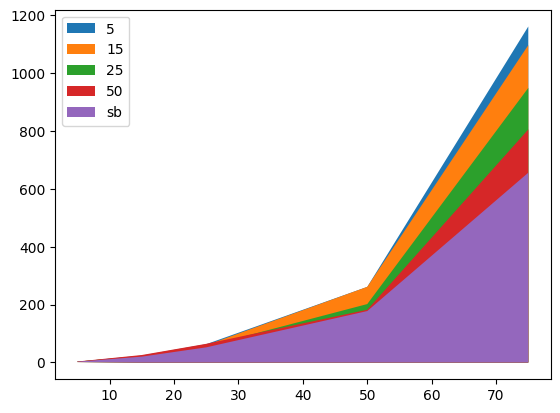

In [38]:
def plot(test_results):
    x = np.array([5, 15, 25, 50, 75])
    for k, v in test_results.items():
        m = list()
        std = list()
        for x_ in x:
            l = v[str(x_)]
            m.append(l[0])
            std.append(np.std(l[1]))
        m = np.array(m)
        std = np.array(std)
        plt.fill_between(x, np.clip(m-std, 0, np.inf), m+std, label=k, alpha=1)
    plt.legend(loc=2)
plot(logs)

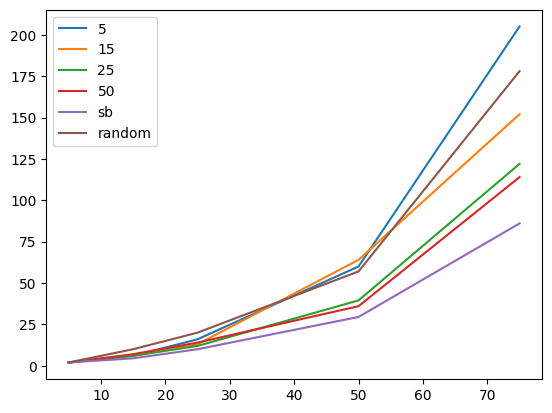

In [31]:
def plot(test_results):
    x = np.array([5, 15, 25, 50, 75])
    for k, v in test_results.items():
        m = list()
        for x_ in x:
            l = v[str(x_)]
            m.append(np.median(l[1]))
        m = np.array(m)
        plt.plot(x, m, label=k, alpha=1)
    plt.legend(loc=2)
plot(logs)

In [28]:
path = '/root/prjs/retro_branching/outputs/facility_15_15/testing/capacitated_facility_location_n_customers_15_n_facilities_15/il//rl_validator/rl_validator_1/checkpoint_10/episodes_log.pkl'



In [64]:
path = '/root/prjs/retro_branching/outputs/facility_25_25/testing/25/rl_validator/rl_validator_1/checkpoint_11/episodes_log.pkl'



In [65]:
with gzip.open(path, "rb") as openfile:
    log = pickle.load(openfile)

In [10]:
log['mean_valid_loss'][0], log['mean_train_loss'][0]

(1.1374288903030694, 1.1499052478797944)

In [66]:
agent_name = log['agent_names']
agent_name

['il']

In [68]:
agent_name = log['agent_names'][0]

# get number of nodes achieved for each instance
num_nodes_for_each_instance = [np.abs(np.sum(episode_nodes)) for episode_nodes in log[agent_name]['num_nodes']]
print(f'Per-instance # nodes: {num_nodes_for_each_instance}')
print(f'All-instances mean # nodes: {np.median(num_nodes_for_each_instance)}')

Per-instance # nodes: [50.0, 6.0, 76.0, 2.0, 56.0, 2.0, 4.0, 74.0, 30.0, 26.0, 4.0, 6.0, 6.0, 6.0, 2.0, 25.0, 17.0, 14.0, 29.0, 14.0, 149.0, 4.0, 172.0, 4.0, 70.0, 42.0, 4.0, 27.0, 70.0, 48.0, 6.0, 20.0, 9.0, 10.0, 13.0, 15.0, 2.0, 6.0, 46.0, 4.0, 40.0, 4.0, 6.0, 6.0, 12.0, 22.0, 64.0, 20.0, 42.0, 2.0, 2.0, 60.0, 8.0, 6.0, 8.0, 17.0, 95.0, 6.0, 12.0, 44.0, 8.0, 2.0, 14.0, 10.0, 2.0, 4.0, 21.0, 16.0, 8.0, 10.0, 10.0, 2.0, 6.0, 64.0, 4.0, 94.0, 18.0, 16.0, 24.0, 24.0, 6.0, 4.0, 16.0, 2.0, 25.0, 2.0, 12.0, 32.0, 66.0, 2.0, 97.0, 4.0, 14.0]
All-instances mean # nodes: 12.0


In [63]:
agent_name = log['agent_names'][0]

# get number of nodes achieved for each instance
num_nodes_for_each_instance = [np.abs(np.sum(episode_nodes)) for episode_nodes in log[agent_name]['num_nodes']]
print(f'Per-instance # nodes: {num_nodes_for_each_instance}')
print(f'All-instances mean # nodes: {np.mean(num_nodes_for_each_instance)}')

Per-instance # nodes: [50.0, 6.0, 76.0, 2.0, 56.0, 2.0, 4.0, 74.0, 30.0, 26.0, 4.0, 6.0, 6.0, 6.0, 2.0, 25.0, 17.0, 14.0, 29.0, 14.0, 149.0, 4.0, 172.0, 4.0, 70.0, 42.0, 4.0, 27.0, 70.0, 48.0, 6.0, 20.0, 9.0, 10.0, 13.0, 15.0, 2.0, 6.0, 46.0, 4.0, 40.0, 4.0, 6.0, 6.0, 12.0, 22.0, 64.0, 20.0, 42.0, 2.0, 2.0, 60.0, 8.0, 6.0, 8.0, 17.0, 95.0, 6.0, 12.0, 44.0, 8.0, 2.0, 14.0, 10.0, 2.0, 4.0, 21.0, 16.0, 8.0, 10.0, 10.0, 2.0, 6.0, 64.0, 4.0, 94.0, 18.0, 16.0, 24.0, 24.0, 6.0, 4.0, 16.0, 2.0, 25.0, 2.0, 12.0, 32.0, 66.0, 2.0, 97.0]
All-instances mean # nodes: 24.912087912087912


In [58]:
for key in log['il']:
    print(key)

action_probabilities
num_nodes
solving_time
lp_iterations
solve_time
step_time
inference_time
dual_bound
primal_bound
gap
episode_run_time
